# np.unique()

In [7]:
import h5py
import astropy.units as u
from galpy.util import bovy_plot, bovy_coords
import pandas
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
gal0= h5py.File('latte/lsr-1-rslice-0.m12f-res7100-md-sliced-gcat-dr2.hdf5','r')
gal1= h5py.File('latte/lsr-1-rslice-1.m12f-res7100-md-sliced-gcat-dr2.hdf5','r')
gal2= h5py.File('latte/lsr-1-rslice-2.m12f-res7100-md-sliced-gcat-dr2.hdf5','r')
gal3= h5py.File('latte/lsr-1-rslice-3.m12f-res7100-md-sliced-gcat-dr2.hdf5','r')
gal4= h5py.File('latte/lsr-1-rslice-4.m12f-res7100-md-sliced-gcat-dr2.hdf5','r')
gal5= h5py.File('latte/lsr-1-rslice-5.m12f-res7100-md-sliced-gcat-dr2.hdf5','r')
gal6= h5py.File('latte/lsr-1-rslice-6.m12f-res7100-md-sliced-gcat-dr2.hdf5','r')
gal7= h5py.File('latte/lsr-1-rslice-7.m12f-res7100-md-sliced-gcat-dr2.hdf5','r')
gal8= h5py.File('latte/lsr-1-rslice-8.m12f-res7100-md-sliced-gcat-dr2.hdf5','r')
gal9= h5py.File('latte/lsr-1-rslice-9.m12f-res7100-md-sliced-gcat-dr2.hdf5','r')
gal=[gal0,gal1,gal2,gal3,gal4,gal5,gal6,gal7,gal8,gal9]

Transform our sample and derive the galactocentric cylindrical coordinates placing the sample at $\phi=0$.

In [9]:
ra= gal0['ra_true'].value
dec= gal0['dec_true'].value
d= 1./gal0['parallax_true'].value # True distances from the simulation
ra= gal0['ra_true'].value
dec= gal0['dec_true'].value
pd= gal0['pmdec_true'].value
pr= gal0['pmra_true'].value
rv= gal0['radial_velocity_true'].value

x0=-7.101408
y0=-4.1
z0=0.
r0= sqrt(x0**2+y0**2)

vx0= -114.035072
vy0= 208.726669
vz0= 5.063526

lb= bovy_coords.radec_to_lb(ra,dec,degree=True,epoch=None)
XYZ= bovy_coords.lbd_to_XYZ(lb[:,0],lb[:,1],d,degree=True)
pmllbb= bovy_coords.pmrapmdec_to_pmllpmbb(pr,pd,ra,dec,degree=True,epoch=None)
UVW= bovy_coords.vrpmllpmbb_to_vxvyvz(rv,pmllbb[:,0],pmllbb[:,1],lb[:,0],lb[:,1],d,degree=True)

# Because of the viewing angle of the mock simulation, you have to rotate the sun's position and velocities 
# To retrieve the correct galactocentric coordinate systems
ang= 30*pi/180
rot= array([[cos(ang),sin(ang)],[-sin(ang),cos(ang)]])

vxy0= dot(rot,[vx0,vy0]).T
xy0= np.dot(rot,[x0,y0]).T

RpZ= bovy_coords.XYZ_to_galcencyl(XYZ[:,0],XYZ[:,1],XYZ[:,2],r0,z0)
Vcy= bovy_coords.vxvyvz_to_galcencyl(UVW[:,0],UVW[:,1],UVW[:,2],XYZ[:,0]-xy0[0],XYZ[:,1]-xy0[1],XYZ[:,2]-z0,
                                     array([vxy0[0],vxy0[1],vz0]),r0,z0)


mask= d<1.

Plot the $v_R$-$v_\phi$ plane in our derived coordinates and the true U-V plane from the system. They are flipped with respect to each other because of the definition of the coordinate systems.

Text(0, 0.5, '$v_y$')

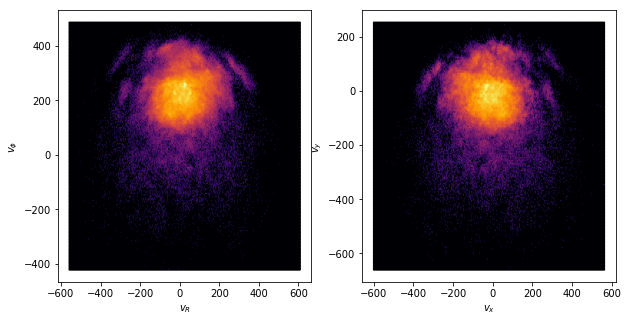

In [10]:
figsize(10,5)
fig,(ax1,ax2)= subplots(1,2)
ax1.hexbin(Vcy[mask,0],Vcy[mask,1],gridsize=300,cmap='inferno',bins='log')
ax1.set_xlabel('$v_R$')
ax1.set_ylabel('$v_T$')
ax2.hexbin(gal0['vx_true'].value[mask],gal0['vy_true'].value[mask],gridsize=300,cmap='inferno',bins='log')
ax2.set_xlabel('$v_x$')
ax2.set_ylabel('$v_y$')

# Calculate Action Angle Coordinates and Plot Clusters

In [12]:
from galpy.actionAngle import actionAngleStaeckel, estimateDeltaStaeckel
from galpy.potential import MWPotential2014

frpz= copy(RpZ)
frpz[:,1][RpZ[:,1]>pi]= RpZ[:,1][RpZ[:,1]>pi]-2*pi
aAS= actionAngleStaeckel(pot=MWPotential2014,delta=0.4)
deltas=estimateDeltaStaeckel(MWPotential2014,RpZ[:,0],RpZ[:,2],no_median=True)

In [13]:
ro= 8.2
vo= 206.
jR,Lz,jz,O_R,O_p,O_z,theta_R,theta_phi,theta_z= aAS.actionsFreqsAngles(RpZ[:,0]/ro,Vcy[:,0]/vo,Vcy[:,1]/vo,
                                                                     RpZ[:,2]/ro,Vcy[:,2]/vo,frpz[:,1]/ro,delta=deltas)

/usr/local/lib/python3.7/site-packages/galpy/actionAngle/actionAngleStaeckel_c.py:455: RuntimeWarning: invalid value encountered in less
  Anglephi[Anglephi < 0.]+= 2.*numpy.pi



/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """



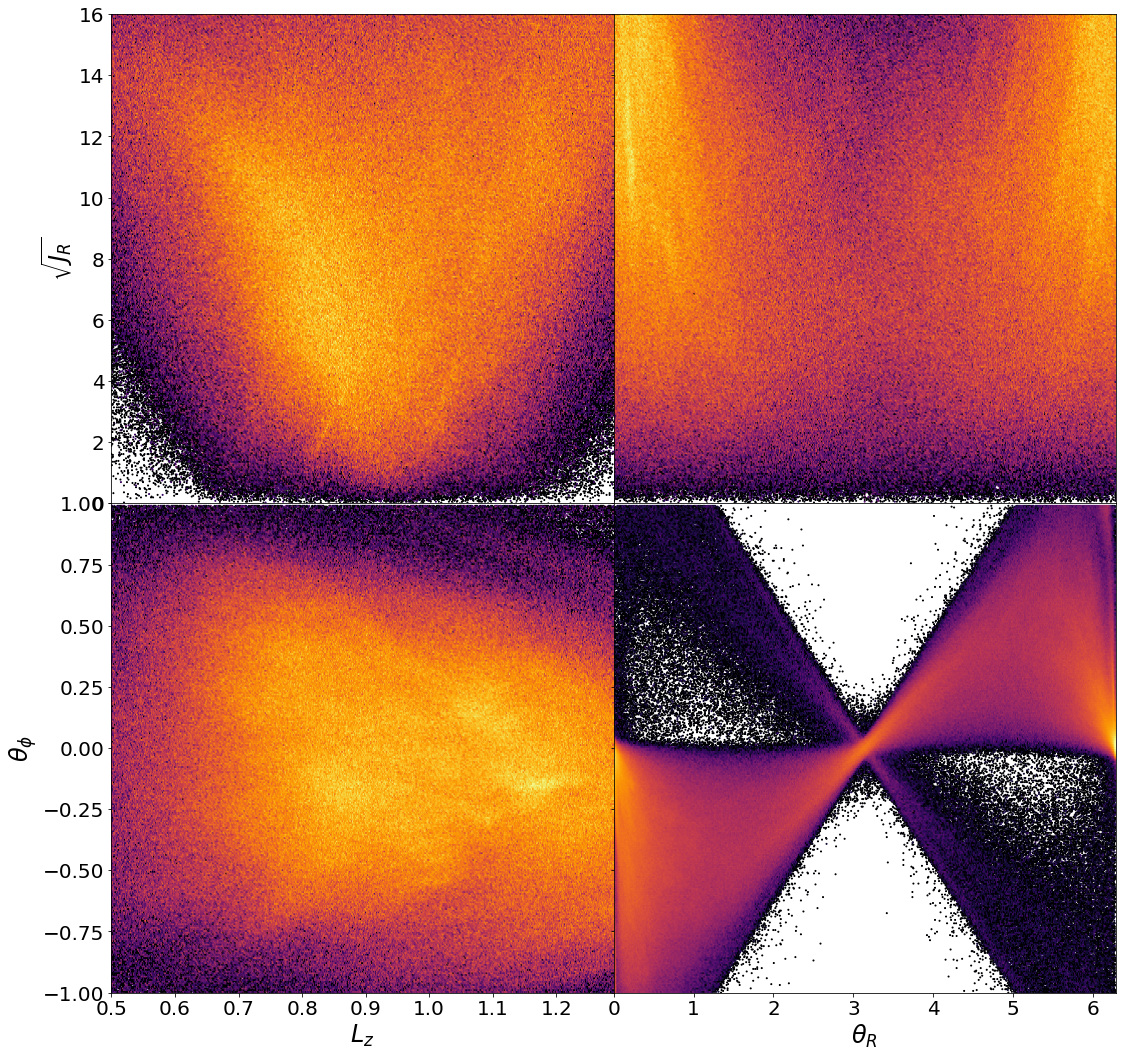

In [32]:
gs=500
ccmap='inferno'
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, sharey='row',sharex='col',figsize=(18,18))
theta_p = np.copy(theta_phi)
theta_p[theta_phi > np.pi] = theta_phi[theta_phi > np.pi] - 2*np.pi
ax1.hexbin(Lz,np.sqrt(jR*220.*8.),extent=[0.5,1.29,0,16],bins='log',gridsize=gs,cmap=ccmap,rasterized=True,mincnt=1)
ax1.set_xlim([0.5,1.29])
ax1.set_ylim([0,16])
ax1.set_ylabel(r'$\sqrt{J_R}$',fontsize=24)
ax2.hexbin(theta_R,np.sqrt(jR*220.*8.),extent=[0,2.*np.pi,0,16],bins='log',gridsize=gs,cmap=ccmap,rasterized=True,mincnt=1)
ax2.set_xlim([0.,2.*np.pi])
ax2.set_ylim([0,16])
ax3.hexbin(Lz,theta_p,extent=[0.5,1.29,-1,0.99],bins='log',gridsize=gs,cmap=ccmap,rasterized=True,mincnt=1)
ax3.set_xlim([0.5,1.29])
ax3.set_ylim([-1,1])
ax3.set_xlabel(r'$L_z$',fontsize=24)
ax3.set_ylabel(r'$\theta_{\phi}$',fontsize=24)
ax4.hexbin(theta_R,theta_p,extent=[0,2.*np.pi,-1,0.99],gridsize=gs,bins='log',cmap=ccmap,rasterized=True,mincnt=1)
ax4.set_xlim([0.,2.*np.pi])
ax4.set_ylim([-1,1])
ax4.set_xlabel(r'$\theta_R$',fontsize=24)
plt.subplots_adjust(wspace=0.)
plt.subplots_adjust(hspace=0.)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('plots/aA-3kpc.pdf',bbox_inches='tight')
plt.show()

# Import Natalie's Clusters

In [15]:
clusters= h5py.File('LATTE_labeled_xyz_eps0.01normed_Npts50.h5py','r')
list(clusters.keys())

label= clusters['dblabels'].value
xyz= clusters['positions'].value 

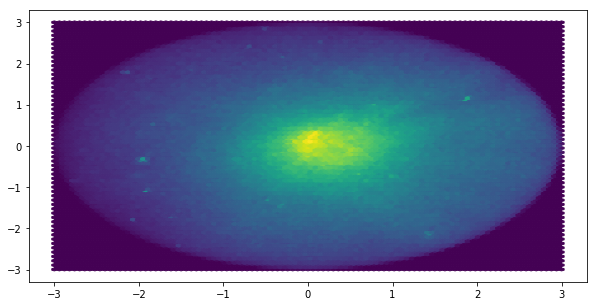

In [16]:
hexbin(xyz[:,0],xyz[:,1])

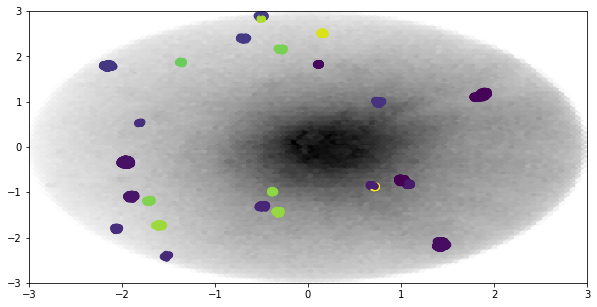

In [23]:
R= sqrt(xyz[:,0]**2+xyz[:,1]**2)
cl= label!=-1
bckgrnd= label==-1
hexbin(XYZ[bckgrnd,0],XYZ[bckgrnd,1],cmap='gray_r')
scatter(xyz[cl,0][R[cl]>1.],xyz[cl,1][R[cl]>1.],c=label[cl][R[cl]>1.])
savefig('plots/clustxy.pdf')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """



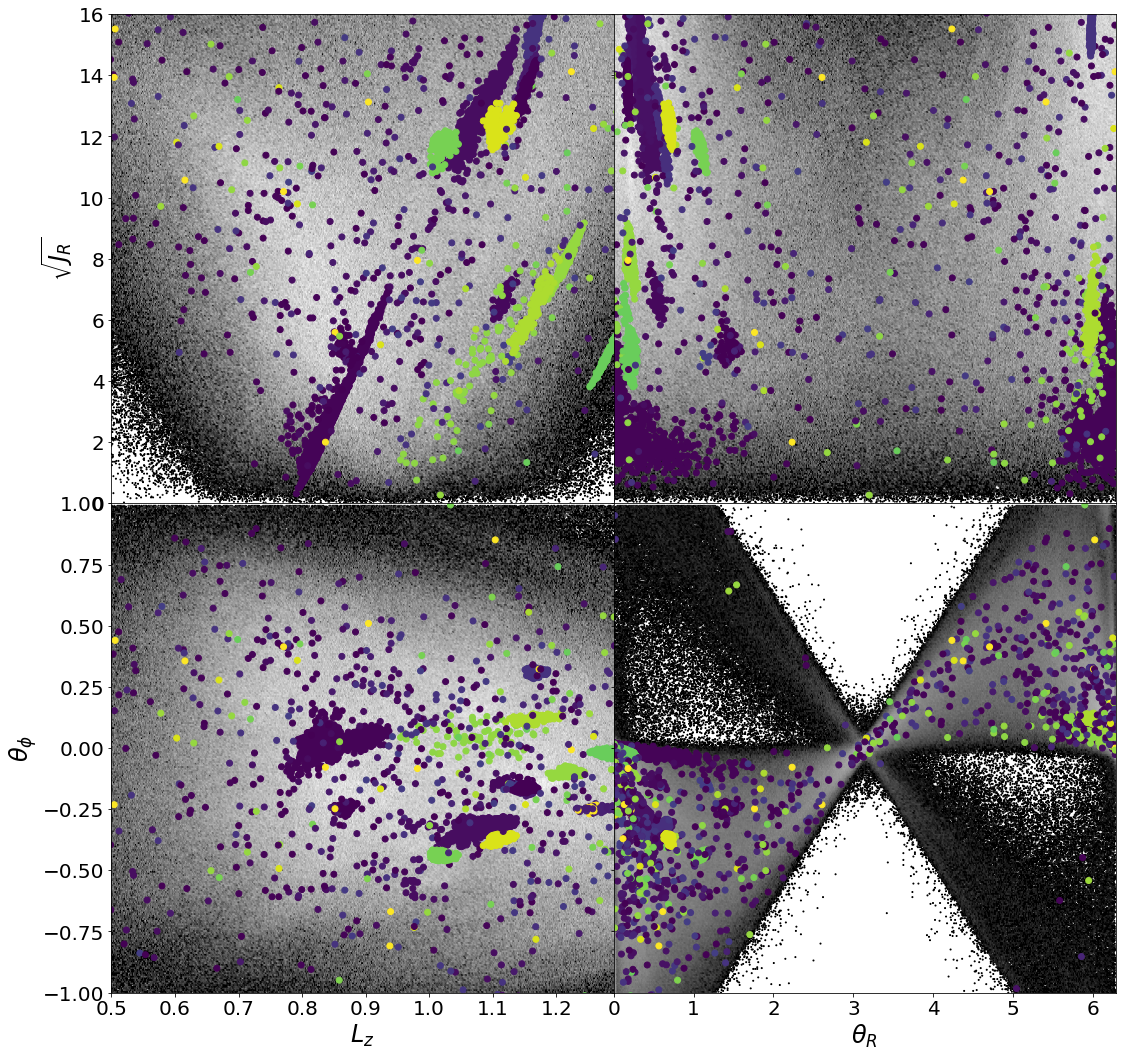

<Figure size 504x504 with 0 Axes>

In [33]:
gs=500
ccmap='gray'
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, sharey='row',sharex='col',figsize=(18,18))
theta_p = np.copy(theta_phi)
theta_p[theta_phi > np.pi] = theta_phi[theta_phi > np.pi] - 2*np.pi
ax1.hexbin(Lz,np.sqrt(jR*220.*8.),extent=[0.5,1.29,0,16],bins='log',gridsize=gs,cmap=ccmap,rasterized=True,mincnt=1)
ax1.scatter(Lz[cl][R[cl]>1.],np.sqrt(jR[cl][R[cl]>1.]*220.*8.),c=label[cl][R[cl]>1.])
ax1.set_xlim([0.5,1.29])
ax1.set_ylim([0,16])
ax1.set_ylabel(r'$\sqrt{J_R}$',fontsize=24)
ax2.hexbin(theta_R,np.sqrt(jR*220.*8.),extent=[0,2.*np.pi,0,16],bins='log',gridsize=gs,cmap=ccmap,rasterized=True,mincnt=1)
ax2.scatter(theta_R[cl][R[cl]>1.],np.sqrt(jR[cl][R[cl]>1.]*220.*8.),c=label[cl][R[cl]>1.])
ax2.set_xlim([0.,2.*np.pi])
ax2.set_ylim([0,16])
ax3.hexbin(Lz,theta_p,extent=[0.5,1.29,-1,0.99],bins='log',gridsize=gs,cmap=ccmap,rasterized=True,mincnt=1)
ax3.scatter(Lz[cl][R[cl]>1.],theta_p[cl][R[cl]>1.],c=label[cl][R[cl]>1.])
ax3.set_xlim([0.5,1.29])
ax3.set_ylim([-1,1])
ax3.set_xlabel(r'$L_z$',fontsize=24)
ax3.set_ylabel(r'$\theta_{\phi}$',fontsize=24)
ax4.hexbin(theta_R,theta_p,extent=[0,2.*np.pi,-1,0.99],gridsize=gs,bins='log',cmap=ccmap,rasterized=True,mincnt=1)
ax4.scatter(theta_R[cl][R[cl]>1.],theta_p[cl][R[cl]>1.],c=label[cl][R[cl]>1.])
ax4.set_xlim([0.,2.*np.pi])
ax4.set_ylim([-1,1])
ax4.set_xlabel(r'$\theta_R$',fontsize=24)
plt.subplots_adjust(wspace=0.)
plt.subplots_adjust(hspace=0.)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=20)
plt.show()

savefig('plots/cluster_aA.pdf')